- The problem addressed in this project is to design and implement machine learning models that can predict the IMDB rating of a movie using its metadata (regression problem).
- The objective is to build reliable, scalable, and data-driven predictive systems that outperform traditional manual analysis and provide actionable insights for decision-making in the entertainment industry.

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
import xgboost 
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, f1_score,roc_curve

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')


## Importing Data

In [143]:
data = pd.read_csv('/Users/krushilramani/_ML_/projects/IMDB/movie_metadata.csv')
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


| Column Name               | Description                                              |   |
| ------------------------- | -------------------------------------------------------- | - |
| color                     | Indicates whether the movie is in color or black & white |   |
| director_name             | Name of the movie director                               |   |
| num_critic_for_reviews    | Number of critic reviews received                        |   |
| duration                  | Length of the movie in minutes                           |   |
| director_facebook_likes   | Number of Facebook likes for the director                |   |
| actor_3_facebook_likes    | Facebook likes of the third lead actor                   |   |
| actor_2_name              | Name of the second lead actor                            |   |
| actor_1_facebook_likes    | Facebook likes of the lead actor                         |   |
| gross                     | Total worldwide box office revenue (USD)                 |   |
| genres                    | Movie genres                                             |   |
| actor_1_name              | Name of the lead actor                                   |   |
| movie_title               | Title of the movie                                       |   |
| num_voted_users           | Number of users who voted on IMDb                        |   |
| cast_total_facebook_likes | Total Facebook likes of the movie cast                   |   |
| actor_3_name              | Name of the third lead actor                             |   |
| facenumber_in_poster      | Number of faces visible in the movie poster              |   |
| plot_keywords             | Keywords describing the movie plot                       |   |
| movie_imdb_link           | IMDb URL of the movie                                    |   |
| num_user_for_reviews      | Number of user reviews                                   |   |
| language                  | Primary language of the movie                            |   |
| country                   | Country where the movie was produced                     |   |
| content_rating            | MPAA content rating (PG, PG-13, R, etc.)                 |   |
| budget                    | Budget of the movie (USD)                                |   |
| title_year                | Year the movie was released                              |   |
| actor_2_facebook_likes    | Facebook likes of the second actor                       |   |
| imdb_score                | IMDb rating (1–10)                                       |   |
| aspect_ratio              | Aspect ratio of the movie screen                         |   |
| movie_facebook_likes      | Facebook likes of the movie                              |   |


In [145]:
df = data.copy()

In [146]:
df.shape

(5043, 28)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [148]:
## droping columns that can not contribute to prediction

df.drop(['director_name','actor_2_name','actor_1_name','movie_title','actor_3_name','facenumber_in_poster','plot_keywords','movie_imdb_link','aspect_ratio'],axis=1,inplace=True)

In [149]:
## removing these columns because it is already captured indirectly via cast_total_facebook_likes
df.drop(['actor_3_facebook_likes','actor_1_facebook_likes','actor_2_facebook_likes'],axis=1,inplace=True)

In [150]:
df.shape

(5043, 16)

## Missing Values Handling

In [151]:
## sum of missing values in each column
df.isna().sum()

color                         19
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
gross                        884
genres                         0
num_voted_users                0
cast_total_facebook_likes      0
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
imdb_score                     0
movie_facebook_likes           0
dtype: int64

In [152]:
## Percentage of missing values in each column
round(df.isna().sum()/ len(df) * 100,2)

color                         0.38
num_critic_for_reviews        0.99
duration                      0.30
director_facebook_likes       2.06
gross                        17.53
genres                        0.00
num_voted_users               0.00
cast_total_facebook_likes     0.00
num_user_for_reviews          0.42
language                      0.28
country                       0.10
content_rating                6.01
budget                        9.76
title_year                    2.14
imdb_score                    0.00
movie_facebook_likes          0.00
dtype: float64

In [153]:
## filling Null values
cat_col=df.select_dtypes(include=['object']).columns.tolist()
num_col=df.select_dtypes(include=['float64','int64']).columns.tolist()

In [154]:
## null values in categorical column
df[cat_col].isna().sum()

color              19
genres              0
language           14
country             5
content_rating    303
dtype: int64

In [155]:
## filling missing values in categorical column with mode
for i in cat_col:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [156]:
df[cat_col].isna().sum()

color             0
genres            0
language          0
country           0
content_rating    0
dtype: int64

In [157]:
## null values in numerical column
df[num_col].isna().sum()

num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
gross                        884
num_voted_users                0
cast_total_facebook_likes      0
num_user_for_reviews          21
budget                       492
title_year                   108
imdb_score                     0
movie_facebook_likes           0
dtype: int64

In [158]:
## filling missing values in numeric column with median
for i in num_col:
    df[i].fillna(df[i].median(),inplace=True)

In [159]:
df[num_col].isna().sum()

num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
gross                        0
num_voted_users              0
cast_total_facebook_likes    0
num_user_for_reviews         0
budget                       0
title_year                   0
imdb_score                   0
movie_facebook_likes         0
dtype: int64

## Cheking for duplicates

In [160]:
df.shape

(5043, 16)

In [161]:
df.duplicated().sum()

45

In [162]:
## removing duplicates 
df.drop_duplicates(inplace=True)

In [163]:
df.shape

(4998, 16)

## Checking for Outlier

In [164]:
num_col

['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'gross',
 'num_voted_users',
 'cast_total_facebook_likes',
 'num_user_for_reviews',
 'budget',
 'title_year',
 'imdb_score',
 'movie_facebook_likes']

### Boxplot for Outlier

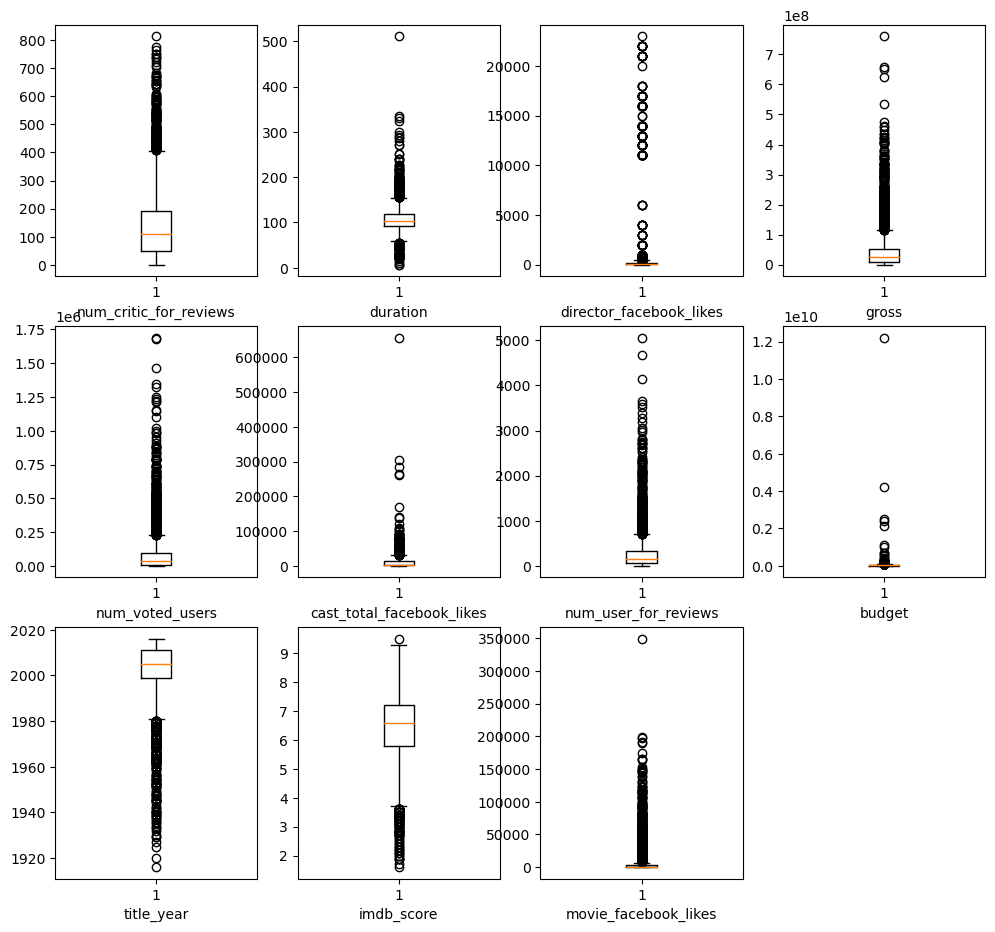

In [165]:
## plotting boxplot for outlier checking
plt.figure(figsize=(12,15))
plt.subplot(4,4,1)
plt.boxplot(df['num_critic_for_reviews'])
plt.xlabel("num_critic_for_reviews")

plt.subplot(4,4,2)
plt.boxplot(df['duration'])
plt.xlabel("duration")

plt.subplot(4,4,3)
plt.boxplot(df['director_facebook_likes'])
plt.xlabel("director_facebook_likes")

plt.subplot(4,4,4)
plt.boxplot(df['gross'])
plt.xlabel("gross")

plt.subplot(4,4,5)
plt.boxplot(df['num_voted_users'])
plt.xlabel("num_voted_users")

plt.subplot(4,4,6)
plt.boxplot(df['cast_total_facebook_likes'])
plt.xlabel("cast_total_facebook_likes")

plt.subplot(4,4,7)
plt.boxplot(df['num_user_for_reviews'])
plt.xlabel("num_user_for_reviews")

plt.subplot(4,4,8)
plt.boxplot(df['budget'])
plt.xlabel("budget")

plt.subplot(4,4,9)
plt.boxplot(df['title_year'])
plt.xlabel("title_year")

plt.subplot(4,4,10)
plt.boxplot(df['imdb_score'])
plt.xlabel("imdb_score")

plt.subplot(4,4,11)
plt.boxplot(df['movie_facebook_likes'])
plt.xlabel("movie_facebook_likes")

plt.show()

In [166]:
## capping outliers
update_num_col= ['num_critic_for_reviews','duration','director_facebook_likes','gross',
                 'num_voted_users','cast_total_facebook_likes','num_user_for_reviews','budget',
                 'title_year','movie_facebook_likes']
def outlier_fun(df,co):
    Q1 = df[co].quantile(0.25)
    Q3 = df[co].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    df[co]=np.where(
        df[co] > upper_limit , upper_limit,
        np.where(df[co] < lower_limit, lower_limit, df[co])
    )

In [167]:
for i in update_num_col:
    outlier_fun(df,i)

## Univariate Analysis – Numerical Features


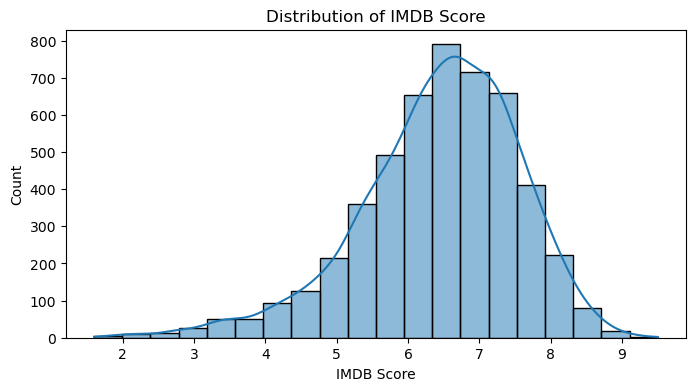

In [ ]:
## Target variable distribution
plt.figure(figsize=(8,4))
sns.histplot(df['imdb_score'], bins=20, kde=True)
plt.title("Distribution of IMDB Score")
plt.xlabel("IMDB Score")
plt.show()


- The IMDB score distribution is approximately normal.
- Most movies lie between 5.5 and 7.5.
- Peak (mode) is around 6.5–7.0.
- Very few movies have extremely low scores (<3) or very high scores (>9).

## Univariate Analysis – Categorical Features

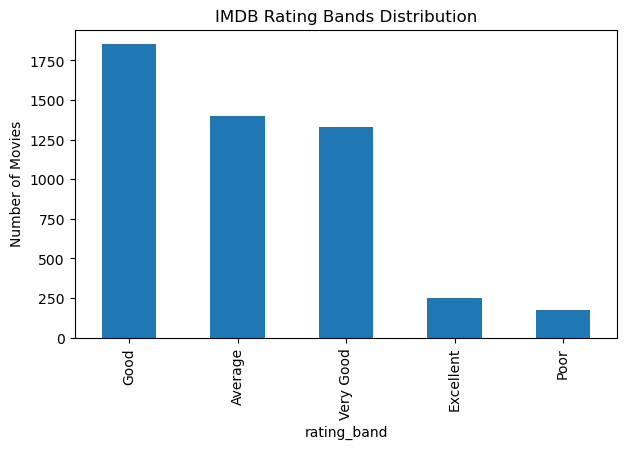

In [171]:
df1=df.copy()
df1['rating_band'] = pd.cut(
    df1['imdb_score'],
    bins=[0,4,6,7,8,10],
    labels=['Poor','Average','Good','Very Good','Excellent']
)

df1['rating_band'].value_counts().plot(kind='bar', figsize=(7,4))
plt.title("IMDB Rating Bands Distribution")
plt.ylabel("Number of Movies")
plt.show()


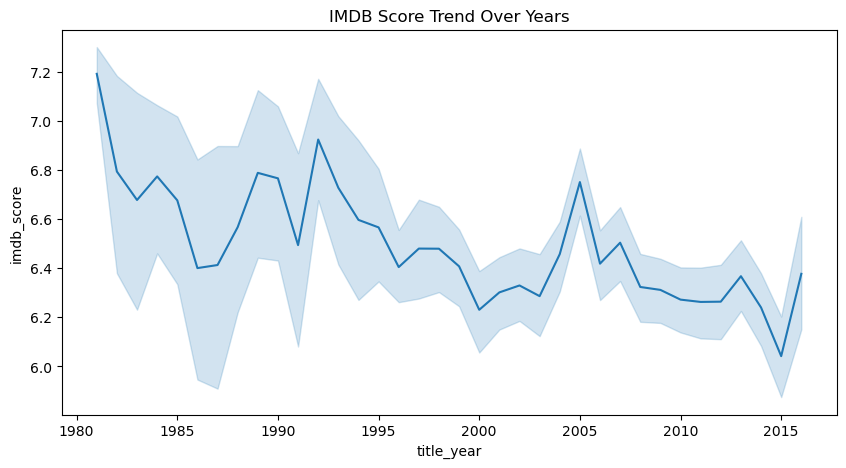

In [172]:
plt.figure(figsize=(10,5))
sns.lineplot(x='title_year', y='imdb_score', data=df)
plt.title("IMDB Score Trend Over Years")
plt.show()


- Gradual decline in average IMDB score over time.
- Older movies (1980s–90s) tend to have slightly higher ratings.
- Modern era shows:
    1. More fluctuation
    2. Slightly lower average scores

## Bivariate Analysis (Feature ↔ Target)

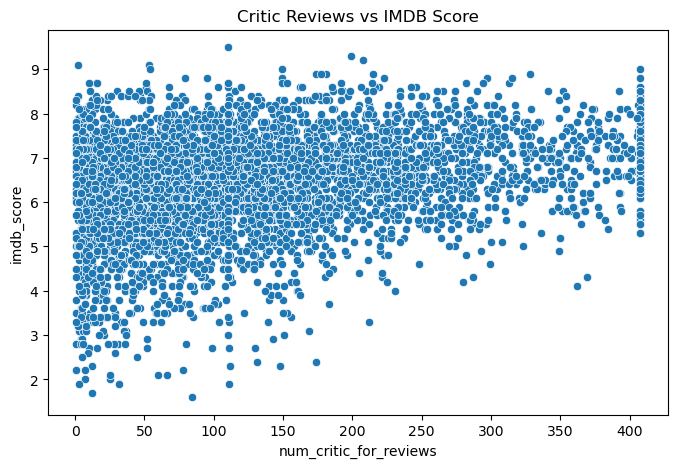

In [173]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='num_critic_for_reviews', y='imdb_score', data=df)
plt.title("Critic Reviews vs IMDB Score")
plt.show()


- Positive but weak-to-moderate correlation
- As the number of critic reviews increases, IMDB score tends to increase slightly.
- The trend is upward, but not steep.

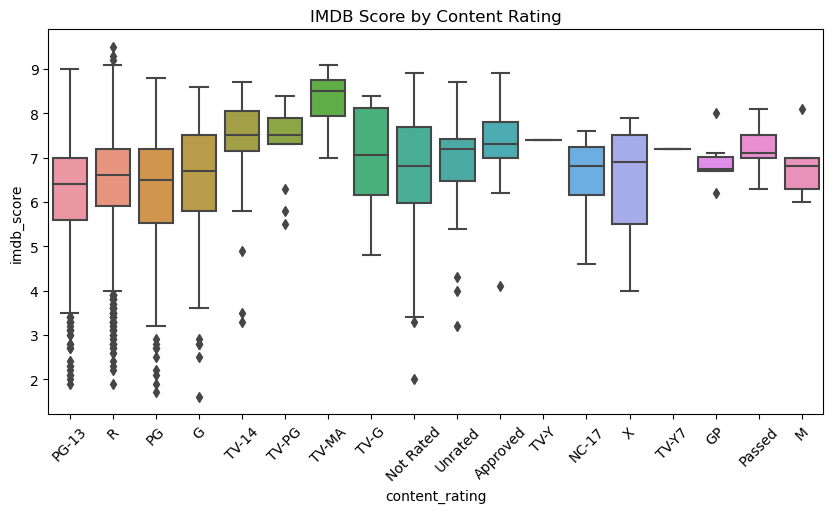

In [174]:
plt.figure(figsize=(10,5))
sns.boxplot(x='content_rating', y='imdb_score', data=df)
plt.xticks(rotation=45)
plt.title("IMDB Score by Content Rating")
plt.show()


1. TV-MA, TV-14, TV-PG
    - Have higher median IMDB scores (~7.5–8.5).
    - Indicates strong audience reception for mature / streaming-era content.

2. R, PG-13, PG
    - Wide spread (from very low to very high scores).
    - These are mass-market categories → high variability in quality.

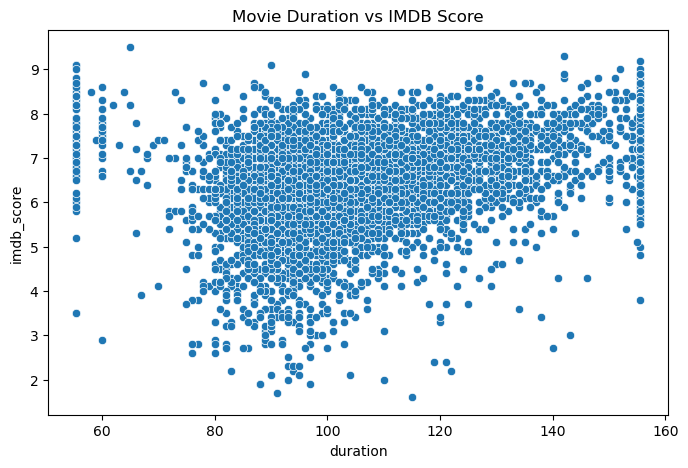

In [175]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='duration', y='imdb_score', data=df)
plt.title("Movie Duration vs IMDB Score")
plt.show()


- A positive trend between duration and IMDB score.
- High-rated movies are rarely very short.
- Best-rated movies often lie in 100–150 min range.

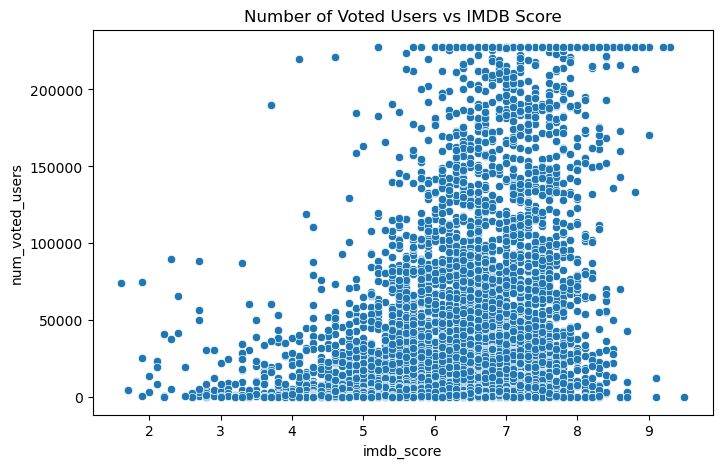

In [176]:

plt.show()
plt.figure(figsize=(8,5))
sns.scatterplot(x='imdb_score', y='num_voted_users', data=df)
plt.title("Number of Voted Users vs IMDB Score")
plt.show()

- Strong positive relationship between: IMDB score & Number of user votes
- High-rated movies tend to have many more votes

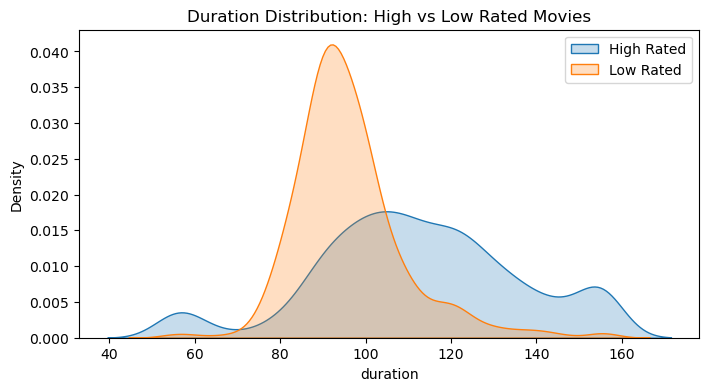

In [177]:
high = df[df['imdb_score'] >= 7]
low = df[df['imdb_score'] <= 5]

plt.figure(figsize=(8,4))
sns.kdeplot(high['duration'], label='High Rated', fill=True)
sns.kdeplot(low['duration'], label='Low Rated', fill=True)
plt.title("Duration Distribution: High vs Low Rated Movies")
plt.legend()
plt.show()


- High-rated movies:

    - Tend to have longer durations
    - Distribution peaks around 110–125 minutes
    - Wider spread → more variability

- Low-rated movies:

    - Concentrated around 85–100 minutes
    - Narrower distribution
    - Very few long movies

## Multivariate Analysis

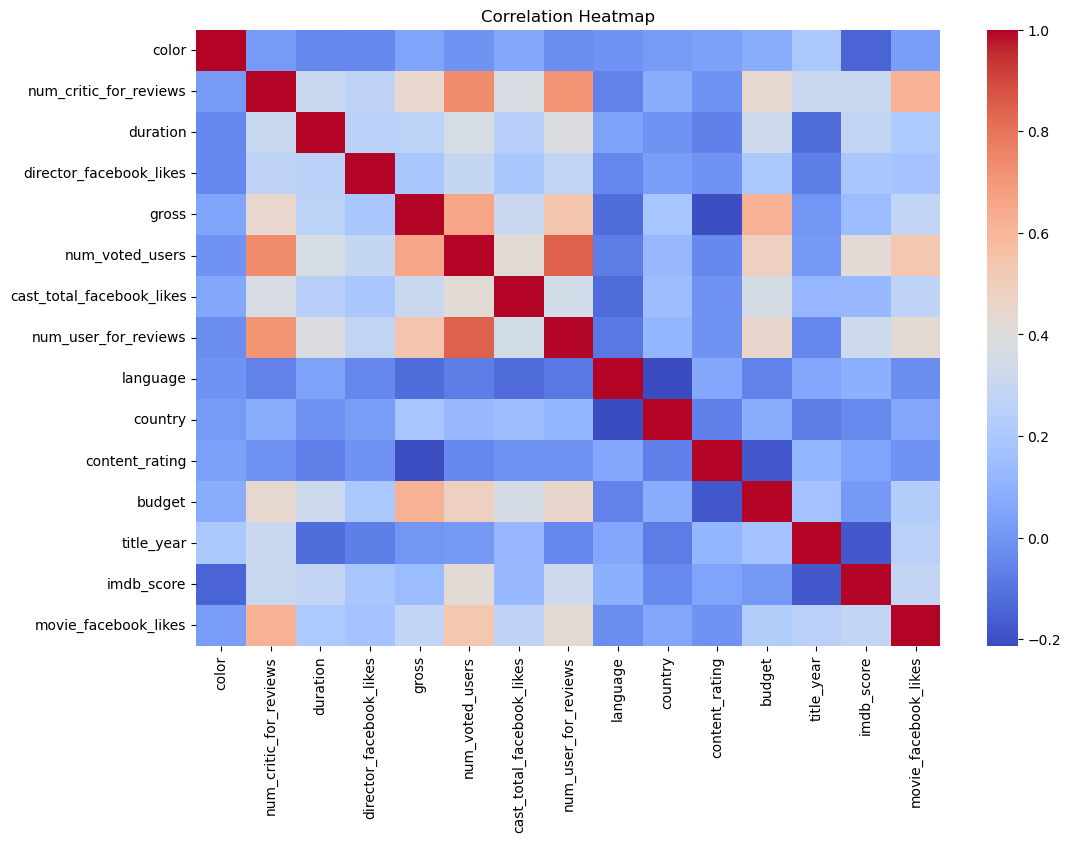

In [230]:
# sns.pairplot(data)
# plt.show()
# plt.figure(figsize=(10,10))
# cor = df[num_col].corr()
# sns.heatmap(cor,annot=True)
# plt.show()

plt.figure(figsize=(12,8))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


- IMDB score is positively correlated with num_voted_users, num_user_for_reviews, and num_critic_for_reviews.

- Duration shows a mild positive correlation with IMDB score.

- Title year is negatively correlated with IMDB score, while budget and Facebook likes show weak correlation.

In [179]:
df.shape

(4998, 16)

## Labeling Categorical Columns

In [180]:
cat_col

['color', 'genres', 'language', 'country', 'content_rating']

In [181]:
## transforming categorical values into label encoded values

le_color = LabelEncoder()
le_genres = LabelEncoder()
le_language = LabelEncoder()
le_country = LabelEncoder()
le_content_rating = LabelEncoder()

df['color'] = le_color.fit_transform(df['color'])
df['language'] = le_language.fit_transform(df['language'])
df['country'] = le_country.fit_transform(df['country'])
df['content_rating'] = le_content_rating.fit_transform(df['content_rating'])

In [182]:
## labeling genres column

from sklearn.preprocessing import MultiLabelBinarizer


df['genres'] = (
    df['genres']
    .fillna('')
    .str.split('|')
)

mlb = MultiLabelBinarizer()

df_genres_encoded = mlb.fit_transform(df['genres'])


df_genres = pd.DataFrame(
    df_genres_encoded,
    columns=mlb.classes_,
    index=df.index
)

df_final = pd.concat(
    [df.drop(columns=['genres']), df_genres],
    axis=1
)





## Splitting Dataset

In [183]:
x=df_final.drop("imdb_score",axis=1)
y=df_final['imdb_score']

In [184]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [185]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3998, 40), (1000, 40), (3998,), (1000,))

## Scaling Numeric Values

In [186]:
num_col.remove("imdb_score")

In [187]:
x_train.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,language,country,content_rating,budget,title_year,movie_facebook_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
5010,1,43.0,85.0,26.0,2.551750e+07,1894.0,40.0,61.0,11,62,9,20000000.0,2002.0,108.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2982,1,132.0,122.0,462.0,6.754898e+06,20000.0,1291.0,188.0,11,62,9,12000000.0,2006.0,0.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1587,1,142.0,108.0,6.0,1.158680e+08,200260.0,7872.0,431.0,11,62,9,30000000.0,2001.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
632,1,141.0,124.0,0.0,7.106988e+07,101899.0,32243.0,445.0,11,62,9,68000000.0,2001.0,0.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4853,1,71.0,91.0,132.0,4.186931e+06,6041.0,1330.0,85.0,11,62,9,250000.0,2001.0,169.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [188]:
## transforming numeric values into same range
sc = StandardScaler()

x_train[num_col] = sc.fit_transform(x_train[num_col])
x_test[num_col] = sc.transform(x_test[num_col])


In [189]:
x_train.head(2)

,color,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,language,country,content_rating,budget,title_year,movie_facebook_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
5010,1,-0.849583,-1.075807,-0.626230,-0.298716,-0.861338,-0.828992,-0.782672,11,62,9,-0.296224,-0.148318,-0.597968,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2982,1,-0.017538,0.791604,2.100832,-0.826581,-0.611451,-0.702310,-0.181420,11,62,9,-0.593396,0.281452,-0.633017,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [190]:
x_test.head(2)

,color,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,language,country,content_rating,budget,title_year,movie_facebook_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
1375,1,0.646228,0.034545,-0.788853,0.245670,0.152411,0.633569,-0.238231,11,62,9,0.335265,0.711222,-0.633017,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1672,1,-0.223212,0.085016,2.100832,-0.270348,-0.583876,-0.729449,0.003216,11,62,9,0.075240,-0.578088,-0.633017,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [191]:
x_train.head()


,color,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,language,country,content_rating,budget,title_year,movie_facebook_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
5010,1,-0.849583,-1.075807,-0.626230,-0.298716,-0.861338,-0.828992,-0.782672,11,62,9,-0.296224,-0.148318,-0.597968,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2982,1,-0.017538,0.791604,2.100832,-0.826581,-0.611451,-0.702310,-0.181420,11,62,9,-0.593396,0.281452,-0.633017,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1587,1,0.075950,0.085016,-0.751325,2.243196,1.876377,-0.035890,0.969007,11,62,9,0.075240,-0.255760,-0.633017,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
632,1,0.066602,0.892545,-0.788853,0.982849,0.518864,2.432023,1.035286,11,62,9,1.486805,-0.255760,-0.633017,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4853,1,-0.587816,-0.772984,0.036771,-0.898828,-0.804104,-0.698361,-0.669050,11,62,9,-1.029867,-0.255760,-0.578172,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [192]:
x_train.shape

(3998, 40)

## Model Building

### LinerRegression Model

In [193]:
lr = LinearRegression()
model_lr = lr.fit(x_train,y_train)

In [194]:
y_pred_lr = model_lr.predict(x_test)

In [195]:
mean_squared_error(y_test,y_pred_lr)

0.6945037646624946

In [196]:
np.sqrt(mean_squared_error(y_test,y_pred_lr))

0.833368924704116

### REF in LinerRegression Model

In [197]:
rfe = RFE(lr,n_features_to_select=30)
rfe = rfe.fit(x_train, y_train)

In [198]:
rfe_col_lr = x_train.columns[rfe.support_]

In [199]:
x_train_rfe = x_train[rfe_col_lr]
x_test_rfe = x_test[rfe_col_lr]

In [200]:
lr1 = LinearRegression()
model_lr1 = lr1.fit(x_train_rfe,y_train)
y_pred_lr1 = model_lr1.predict(x_test_rfe)

In [201]:
mean_squared_error(y_test,y_pred_lr1)

0.7162371566666902

In [202]:
RMSE_LR=np.sqrt(mean_squared_error(y_test,y_pred_lr1))
RMSE_LR

0.84630795616412

In [203]:
R2_SCORE_LR= r2_score(y_test,y_pred_lr1)
R2_SCORE_LR

0.43907729268458295

### DecisionTreeRegressor

In [204]:
dt = DecisionTreeRegressor(
    max_depth=10,
    min_samples_leaf=5,
    min_samples_split=5
)
model_dt = dt.fit(x_train,y_train)


In [205]:
y_pred_dt = model_dt.predict(x_test)

In [206]:
mean_squared_error(y_test,y_pred_dt)

0.7686910576171385

In [207]:
RMSE_DT=np.sqrt(mean_squared_error(y_test,y_pred_dt))
RMSE_DT

0.876750282359315

In [208]:
R2_SCORE_DT= r2_score(y_test,y_pred_dt)
R2_SCORE_DT

0.39799790458454287

### RandomForestRegressor

In [209]:
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    max_features=12,
    min_samples_leaf=8,
    min_samples_split=8
)

In [210]:
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=15, max_features=12, min_samples_leaf=8,
                      min_samples_split=8)

In [211]:
y_pred_rf= rf.predict(x_test)

In [212]:
mean_squared_error(y_test,y_pred_rf)

0.5635418006667631

In [213]:
RMSE_RF = np.sqrt(mean_squared_error(y_test,y_pred_rf))
RMSE_RF

0.7506942124905207

In [214]:
R2_SCORE_RF= r2_score(y_test,y_pred_rf)
R2_SCORE_RF

0.5586609971667409

### Xgboost

In [215]:
xgb = xgboost.XGBRegressor(
      n_estimators=300,
    learning_rate=0.05,
    max_depth=10,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

In [216]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [217]:
y_pred_xgb= xgb.predict(x_test)

In [218]:
mean_squared_error(y_test,y_pred_xgb)

0.47170433420542485

In [219]:
RMSE_XGB=np.sqrt(mean_squared_error(y_test,y_pred_xgb))
RMSE_XGB

0.6868073486833297

In [220]:
R2_SCORE_XGB=r2_score(y_test,y_pred_xgb)
R2_SCORE_XGB

0.6305837113697059

### ANN

In [221]:
model_ann = Sequential()
model_ann.add(Dense(128, activation ='relu'))
model_ann.add(Dropout(0.2))
model_ann.add(Dense(64, activation='relu'))
model_ann.add(Dropout(0.2))
model_ann.add(Dense(32, activation='relu'))
model_ann.add(Dropout(0.2))
model_ann.add(Dense(1))
model_ann.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [222]:
model_ann.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [223]:
model_ann.fit(x_train,y_train,validation_split=0.2,epochs=100,batch_size=10)

Epoch 1/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6.9915 - root_mean_squared_error: 2.6138 - val_loss: 2.5343 - val_root_mean_squared_error: 1.5920
Epoch 2/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - loss: 3.0714 - root_mean_squared_error: 1.7521 - val_loss: 1.5650 - val_root_mean_squared_error: 1.2510
Epoch 3/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - loss: 2.6088 - root_mean_squared_error: 1.6146 - val_loss: 1.5776 - val_root_mean_squared_error: 1.2560
Epoch 4/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.3023 - root_mean_squared_error: 1.5171 - val_loss: 2.3087 - val_root_mean_squared_error: 1.5194
Epoch 5/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - loss: 2.0475 - root_mean_squared_error: 1.4308 - val_loss: 1.2259 - val_root_mean_squared_error: 1.1072
Epoch 6/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - loss: 1.9338 - root_mean_squared_error: 1.3900 - val_loss: 2.1475 - val_root_mean_squared_error: 1.4654
Epoch 7/100
320/320 ━━━━━━━━━━━━━━━━━━

In [224]:
y_pred_ann=model_ann.predict(x_test)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [225]:
mean_squared_error(y_test,y_pred_ann)

0.6080308061946404

In [226]:
RMSE_ANN=np.sqrt(mean_squared_error(y_test,y_pred_ann))
RMSE_ANN

0.7797633013900054

In [227]:
R2_SCORE_ANN=r2_score(y_test,y_pred_ann)
R2_SCORE_ANN

0.523819334465792

## Comparing RMSE and R2score of All models

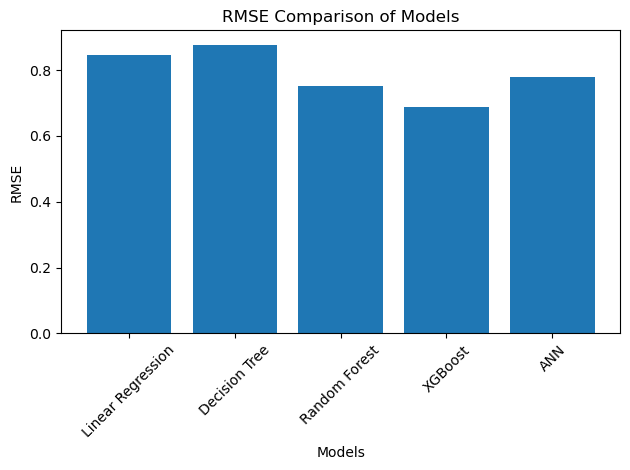

In [228]:


rmse_scores = {
    "Linear Regression": RMSE_LR,
    "Decision Tree": RMSE_DT,
    "Random Forest": RMSE_RF,
    "XGBoost": RMSE_XGB,
    "ANN": RMSE_ANN
}

r2_scores = {
    "Linear Regression": R2_SCORE_LR,
    "Decision Tree": R2_SCORE_DT,
    "Random Forest": R2_SCORE_RF,
    "XGBoost": R2_SCORE_XGB,
    "ANN": R2_SCORE_ANN
}

models = list(rmse_scores.keys())
rmse_values = list(rmse_scores.values())

plt.figure()
plt.bar(models, rmse_values)
plt.xlabel("Models")
plt.ylabel("RMSE")
plt.title("RMSE Comparison of Models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

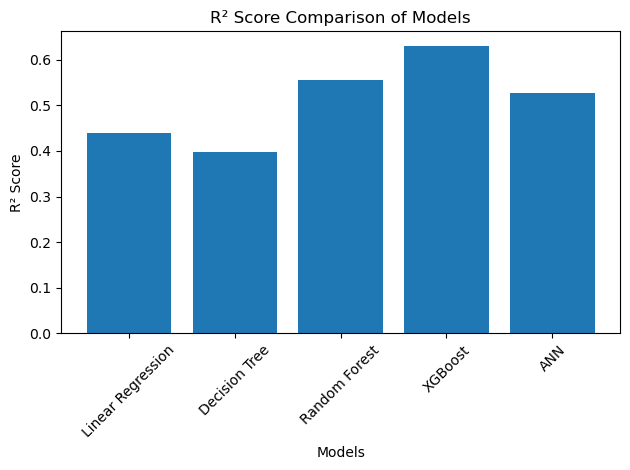

In [135]:
models = list(r2_scores.keys())
r2_values = list(r2_scores.values())


plt.figure()
plt.bar(models, r2_values)

plt.xlabel("Models")
plt.ylabel("R² Score")
plt.title("R² Score Comparison of Models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [140]:
pred_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted_LR": y_pred_lr1,
    "Predicted_DT": y_pred_dt,
    "Predicted_RF": y_pred_rf,
    "Predicted_XGB": y_pred_xgb,
    "Predicted_ANN": y_pred_ann.flatten()
})
pred_df.head(5)

,Actual,Predicted_LR,Predicted_DT,Predicted_RF,Predicted_XGB,Predicted_ANN
1375,5.6,5.961563,6.133333,6.116497,5.940066,6.070920
1672,6.8,6.389258,6.530000,6.418870,6.826622,6.393175
4782,4.3,5.276062,4.585271,5.468983,5.320613,5.038601
200,6.2,5.443767,5.785938,6.120456,6.041543,6.232503
283,8.5,7.676843,8.616667,7.918806,7.786623,7.573739


### Saving XGBOOST Model and Other objects

In [ ]:
joblib.dump({
    "model": xgb,
    "scaler": sc,
    "mlb": mlb,
   "le_color": le_color,
    "le_language":le_language,
    "le_country":le_country,
    "le_content_rating":le_content_rating,
}, "xgb_model.pkl")
